In [83]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from plotnine import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc

**Clean the data**

In [66]:
heart = pd.read_csv("/Users/alexandra/Desktop/GSB-544/Labs/Lab7/heart_attack.csv")
heart.dropna(inplace=True)
heart.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


# Part One: Fitting Models
We will use medical data to predict the likelihood of a person experiencing an exercise-induced heart attack.

### KNN

In [76]:
#define x and y
X = heart.drop(columns=['output'])  
y = heart['output'] 

In [77]:
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model1 = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]  
    
).set_output(transform="pandas")


#find best neighbors
param_knn1 = {
    'knn__n_neighbors': np.arange(1, 100) 
}

#gridsearch
grid_search = GridSearchCV(knn_model1, param_knn1, cv=5, scoring='roc_auc', n_jobs=-1)

# fit data
grid_search.fit(X, y)

best_knn = grid_search.best_estimator_
best_roc_auc = grid_search.best_score_
best_k = grid_search.best_params_['knn__n_neighbors']

# Report the best ROC AUC score from cross-validation
print(f"Best ROC AUC from Cross-Validation: {best_roc_auc:.4f}")
print(f"Best k (number of neighbors): {best_k}")



Best ROC AUC from Cross-Validation: 0.8507
Best k (number of neighbors): 54
Best ROC AUC from Cross-Validation: 0.8507
Best k (number of neighbors): 54


The best ROC AUC from Ccross validation is 0.8507, which means that the model has an 85.07% chance of predicting if the person will have a heart attack. This is pretty good. I got this with a model that had 54 neighbors.

In [78]:
#knn pipeline with best neightbor 54
knn_model2 = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier(n_neighbors= 54))]  
    
).set_output(transform="pandas")

knn_model2.fit(X, y)

y_pred_knn2 = knn_model2.predict(X)  

,not at risk,at risk
not at risk,94,33
at risk,24,122


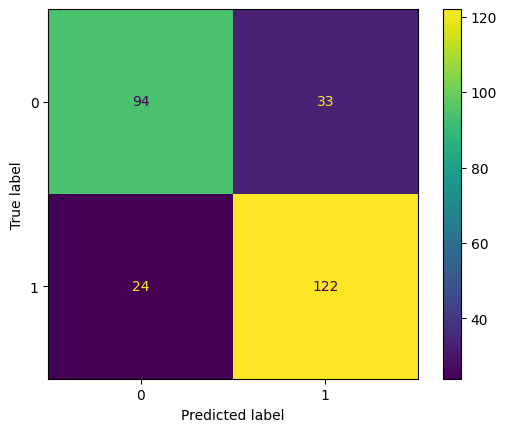

In [53]:
#matrix
cm1= confusion_matrix(y, y_pred_knn2)
cm1
ConfusionMatrixDisplay(cm1).plot()

class_names = ["not at risk", "at risk"]
conf_matrix_knn = pd.DataFrame(cm1, index=class_names, columns=class_names)
conf_matrix_knn


## Q2: Logistic Regression

In [54]:
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

log_model1 = Pipeline(
    [("preprocessing", ct),
    ("log_reg", LogisticRegression())] 
    
).set_output(transform="pandas")


#find best neighbors
param_log1 = {'log_reg__C': [0.01, 0.1, 1, 10, 100]}

#gridsearch
grid_search2 = GridSearchCV(log_model1, param_log1, cv=5, scoring='roc_auc', n_jobs=-1)

# fit data
grid_search2.fit(X, y)
  
#best C
best_C_log1 = grid_search2.best_params_['log_reg__C']
best_roc_auc_log1 = grid_search2.best_score_

print("Log Model:")
print(f"param {best_C_log1}")
print(f"ROC AUC {best_roc_auc_log1}")

Log Model:
param 0.01
ROC AUC 0.8546433244916003
Log Model:
param 0.01
ROC AUC 0.8546433244916003


In [55]:
#log pipeline with best C
best_log_model2 = Pipeline(
    [("preprocessing", ct),
    ("log_reg", LogisticRegression(C=0.01))] 
).set_output(transform="pandas")

best_log_model2.fit(X, y)

y_pred_log = best_log_model2.predict(X)  

,not at risk,at risk
not at risk,88,39
at risk,19,127


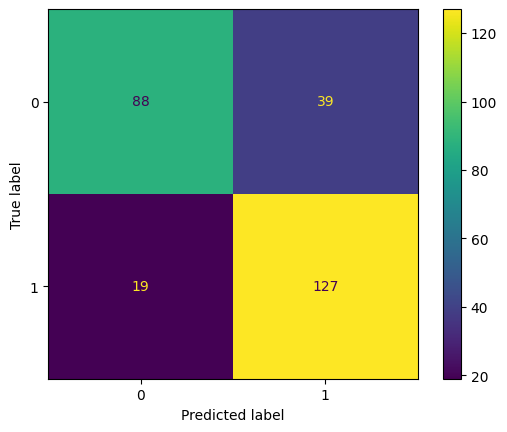

In [56]:
#matrix
cm2= confusion_matrix(y, y_pred_log)
cm2
ConfusionMatrixDisplay(cm2).plot()

class_names = ["not at risk", "at risk"]
conf_matrix_log = pd.DataFrame(cm2, index=class_names, columns=class_names)
conf_matrix_log


### Q3: Decision Tree

In [57]:
# ct = ColumnTransformer(
#     [
#         ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
#     ],
#     remainder="passthrough"
# ).set_output(transform="pandas")

# #decsion tree pipeline
# dt_model1 = Pipeline(
#     [("preprocessing", ct),
#      ("dt", DecisionTreeClassifier())]
# ).set_output(transform="pandas")

# #chat helped pick parameters
# param_dt = {'dt__min_impurity_decrease': [0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# }

# grid_search_dt = GridSearchCV(dt_model1, param_dt, cv=5, scoring='roc_auc', n_jobs=-1)
# grid_search_dt.fit(X, y)


# #best_min_impurity_decrease = grid_search_dt.best_params_['decision_tree__min_impurity_decrease']
# best_params = grid_search_dt.best_params_
# best_roc_auc_dt = grid_search_dt.best_score_
    
# print('Decsion Tree')
# print(f'param {best_params }')
# print(f'ROC AUC{best_roc_auc_dt}')

In [70]:
#tree model
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Decision tree pipeline
dt_model1 = Pipeline(
    [("preprocessing", ct),
     ("dt", DecisionTreeClassifier())]
).set_output(transform="pandas")

# Parameter grid for GridSearchCV
param_dt = {
    #'dt__min_impurity_decrease': [0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'dt__max_depth': range(1, 11),
    'dt__min_samples_split': range(2, 11),
    'dt__min_samples_leaf': range(1, 11),
    'dt__ccp_alpha': [0.001, 0.01, 0.1, 0.2]
}


In [71]:
# GridSearchCV setup
grid_search_dt = GridSearchCV(dt_model1, param_dt, cv=5, scoring='roc_auc', n_jobs=-1)

In [72]:
grid_search_dt.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x130731010>)])),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__ccp_alpha': [0.001, 0.01, 0.1, 0.2],
                         'dt__max_depth': range(1, 11),
                         'dt__min_samples_leaf': range(1, 11),
                         'dt__min_samples_split': range(2, 11)},
             scoring='roc_auc')

In [ ]:
# GridSearchCV setup
grid_search_dt = GridSearchCV(dt_model1, param_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search on the data
grid_search_dt.fit(X, y)

# Retrieve best parameters and score
best_params_dt = grid_search_dt.best_params_

# Output results
print("Decision Tree Results")
print(f"Best Parameters: {best_params_dt}")

In [61]:
#best tree pipeline
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Decision tree pipeline
dt_best_model = Pipeline(
    [
        ("preprocessing", ct),
        ("dt", DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3, min_samples_leaf=8, min_samples_split=2))
    ]
).set_output(transform="pandas")

#fit
dt_best_model.fit(X,y)
#predict 
dt_pred = dt_best_model.predict(X)
#roc auc score
scores_dt = abs(cross_val_score(dt_best_model, X, y, cv=5, scoring='roc_auc'))
print(scores_dt.mean())

0.821165694076039
0.821165694076039


The ROC AUC score of 0.82 indicates that decsion trees are worse at predicting if a patient has a heart attack. 


,not at risk,at risk
not at risk,101,26
at risk,29,117


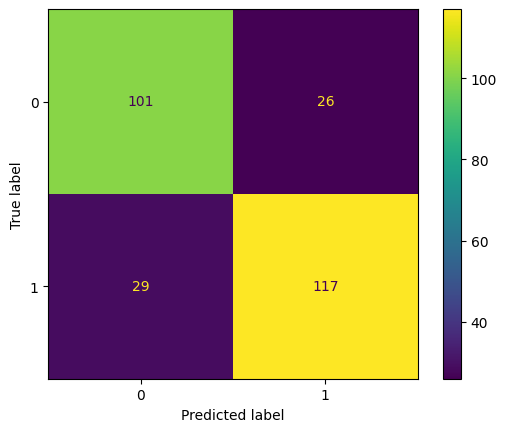

In [62]:
#matrix
cm3= confusion_matrix(y, dt_pred)
cm3
ConfusionMatrixDisplay(cm3).plot()

class_names = ["not at risk", "at risk"]
conf_matrix_log = pd.DataFrame(cm3, index=class_names, columns=class_names)
conf_matrix_log

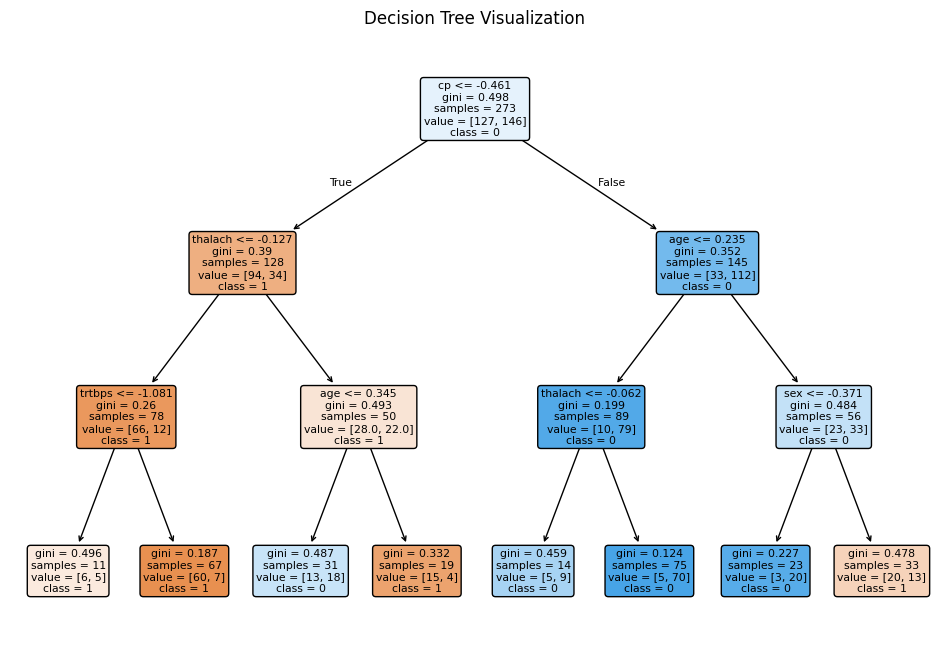

In [63]:
#plot dt with chat gpt help
trained_tree = dt_best_model.named_steps["dt"]

plt.figure(figsize=(12, 8))
plot_tree(
    trained_tree, 
    feature_names=X.columns,  # Replace with actual feature names if X is not a DataFrame
    class_names=y.unique().astype(str),  # Replace with actual class names if y is not numeric
    filled=True, 
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

# Q4: Interpretation
## Which predictors were most important to predicting heart attack risk?

In [80]:
#find best coeffs for log model
log_reg_model = best_log_model2.named_steps['log_reg']
log_reg_coefficients = log_reg_model.coef_[0]
feature_names = best_log_model2.named_steps['preprocessing'].get_feature_names_out()
log_reg_feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': log_reg_coefficients}).sort_values('Coefficient', ascending = False)
log_reg_feature_importance

,Feature,Coefficient
2,standardize__cp,0.302322
6,standardize__thalach,0.280505
5,standardize__restecg,0.086628
4,standardize__chol,-0.054690
3,standardize__trtbps,-0.097634
0,standardize__age,-0.136729
1,standardize__sex,-0.252337


In [81]:
#with chat gpr help to get coeff for dt
# Extract the trained DecisionTreeClassifier from the pipeline
trained_tree = dt_best_model.named_steps["dt"]

# Get feature names from the pipeline's preprocessing step
feature_names = dt_best_model.named_steps["preprocessing"].get_feature_names_out()

# Get the feature importances
importances = trained_tree.feature_importances_

# Combine feature names with their importances
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display the top features
print("Feature Importance Rankings:")
print(importance_df)


Feature Importance Rankings:
                Feature  Importance
2       standardize__cp    0.584983
0      standardize__age    0.156569
6  standardize__thalach    0.116935
1      standardize__sex    0.102721
3   standardize__trtbps    0.038793
4     standardize__chol    0.000000
5  standardize__restecg    0.000000
Feature Importance Rankings:
                Feature  Importance
2       standardize__cp    0.584983
0      standardize__age    0.156569
6  standardize__thalach    0.116935
1      standardize__sex    0.102721
3   standardize__trtbps    0.038793
4     standardize__chol    0.000000
5  standardize__restecg    0.000000


The variables I found to be most impactful was the type of chest pain for both models and age for trees and max heart rate reached.

# ROC CURVE

In [84]:
#PLot ROC curve: used chat gpt 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 3)

probs_knn = knn_model2.predict_proba(X_test)[:, 1]
probs_log_reg = best_log_model2 .predict_proba(X_test)[:, 1]
probs_decision_tree = dt_best_model.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, probs_log_reg)
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_test, probs_decision_tree)

auc_knn = auc(fpr_knn, tpr_knn)
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

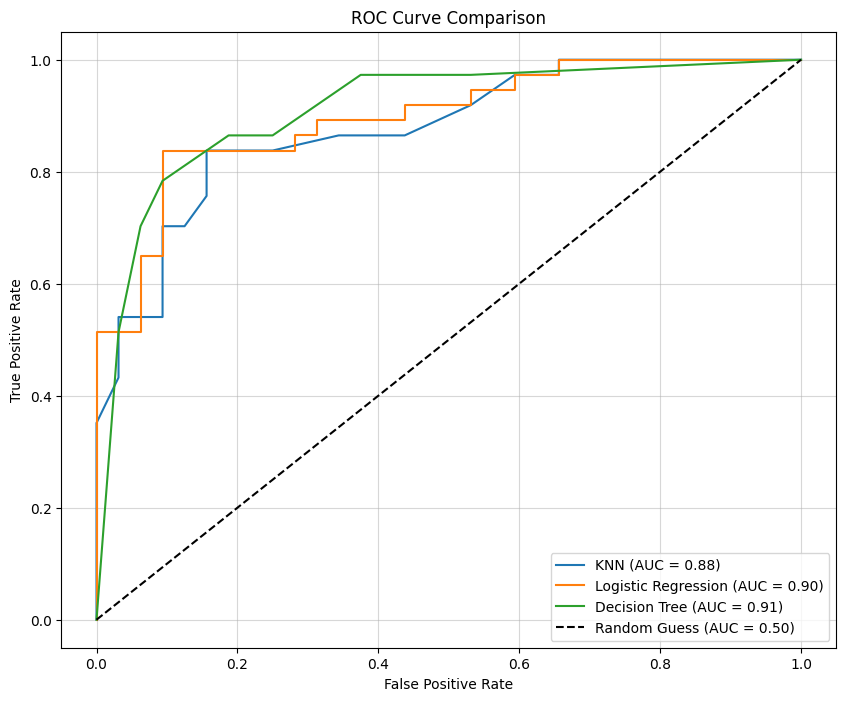

In [87]:
#chat gpt helped me create this plot
plt.figure(figsize=(10, 8))

# KNN ROC Curve
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')

# Logistic Regression ROC Curve
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')

# Decision Tree ROC Curve
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_decision_tree:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)

# Show the plot
plt.show()